<a href="https://colab.research.google.com/github/muditsatija08/genetic-evolution/blob/main/DEAP_Algorithms_(GA_with_multiple_runs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GA Toolbox for DEAP with multiple runs.

All Evolutionary Algorithms are stochastic, so we will almost always want to run them mutiple times to:
* Give the algorithm a best chance to discover an optimal solution;
* Extract meaningful statistics.

Install DEAP.

In [1]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00


Import the DEAP tools and useful libraries (random and matplotlib).

In [2]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt

Set our Genetic Algorithm parameters. Notice that this time we have the all important **N_RUNS** to indicate how many runs we want. Thirty runs is a good number to give us faith in the statistics, but always start with a small number of runs to establish that everything is working the way you think it is.

In [3]:
# Genetic Algorithm constants:
POPULATION_SIZE = 100
P_CROSSOVER = 0.7  # probability for crossover
P_MUTATION = 0.01   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10

N_RUNS = 30


Set any problem-specific constants here. In this case we need to know how long the string is.

In [4]:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

Set the random seed.

In [5]:
RANDOM_SEED = 412
random.seed(RANDOM_SEED)

Create our toolbox. Note that this is the same is in our original example.

In [11]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple


toolbox.register("evaluate", oneMaxFitness)

# genetic operators:

# Tournament selection with tournament size of 3:
# toolbox.register("select", tools.selRoulette)

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)



Create a **list** for each statistic we're going to keep track of (one for each run, once we're finished all runs we'll extract them). This time we're going to up the ante in terms of what we're recording:

* Max fitness;
* Average fitness;
* Min fitness;
* Standard deviation of fitness.

Standard deviation is **hugely** important in EAs as it tells us what the variation is like.

In [12]:
maxList = []
avgList = []
minList = []
stdList = []

Loop through each run. The code inside the loop is pretty much the same that we had in the single run, but this time we have it all in the same cell because we can to loop over. Notice that each run has its **own** hall of fame, so comment out that output if you want to keep things looking tidy.

In [13]:
for r in range(0, N_RUNS):
    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    # Which run are we on?
    print("\n\nCurrently on run", r, "of",N_RUNS)

    # perform the Genetic Algorithm flow:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                               ngen=MAX_GENERATIONS,
                                              stats=stats, halloffame=hof, verbose=True)

    # print Hall of Fame info: (comment out to reduce the output as it generates a LOT)
    #print("Hall of Fame Individuals = ", *hof.items, sep="\n")
    #print("Best Ever Individual = ", hof.items[0])



    # Genetic Algorithm is done with this run - extract statistics:
    meanFitnessValues, stdFitnessValues, minFitnessValues, maxFitnessValues  = logbook.select("avg", "std", "min", "max")

    # Save statistics for this run:
    avgList.append(meanFitnessValues)
    stdList.append(stdFitnessValues)
    minList.append(minFitnessValues)
    maxList.append(maxFitnessValues)





Currently on run 0 of 30
gen	nevals	avg 	std    	min	max
0  	100   	50.5	4.96085	41 	64 
1  	74    	54.91	4.0326 	45 	64 
2  	79    	58.75	3.18237	52 	65 
3  	84    	61.51	2.97488	53 	67 
4  	78    	64.13	2.44399	58 	70 
5  	78    	66.52	2.50791	59 	72 
6  	74    	68.64	2.60967	60 	75 
7  	78    	70.63	2.4399 	64 	77 
8  	69    	72.78	2.08125	68 	78 
9  	66    	74.92	1.58543	71 	78 
10 	76    	76.16	1.17235	73 	80 
11 	68    	77.05	1.49917	73 	82 
12 	66    	78.25	1.56445	75 	83 
13 	68    	79.59	1.84984	76 	84 
14 	76    	81.29	1.7793 	78 	85 
15 	76    	82.61	1.39208	79 	86 
16 	80    	83.76	1.22572	80 	86 
17 	73    	84.69	1.05541	81 	88 
18 	62    	85.5 	0.921954	83 	88 
19 	85    	86.19	0.833007	84 	88 
20 	68    	86.93	0.851528	85 	88 
21 	68    	87.7 	0.608276	86 	89 
22 	75    	88.13	0.50309 	86 	89 
23 	60    	88.43	0.696491	86 	90 
24 	74    	89.03	0.411218	88 	90 
25 	68    	89.27	0.50705 	88 	90 
26 	64    	89.64	0.48    	89 	90 
27 	74    	89.98	0.198997	89 	91 
28 	64  

Create our graphs using the averages across all the runs. Notice how we use standard deviation to show how much variation there is in the runs.

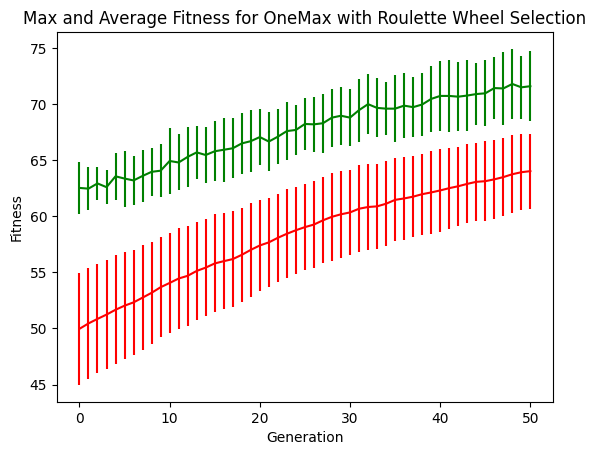

In [10]:
# Genetic Algorithm is done (all runs) - plot statistics:
x = numpy.arange(0, MAX_GENERATIONS+1)
avgArray = numpy.array(avgList)
stdArray = numpy.array(stdList)
minArray = numpy.array(minList)
maxArray = numpy.array(maxList)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Max and Average Fitness for OneMax with Roulette Wheel Selection')
plt.errorbar(x, avgArray.mean(0), yerr=stdArray.mean(0),label="Average",color="Red")
plt.errorbar(x, maxArray.mean(0), yerr=maxArray.std(0),label="Best", color="Green")
plt.show()


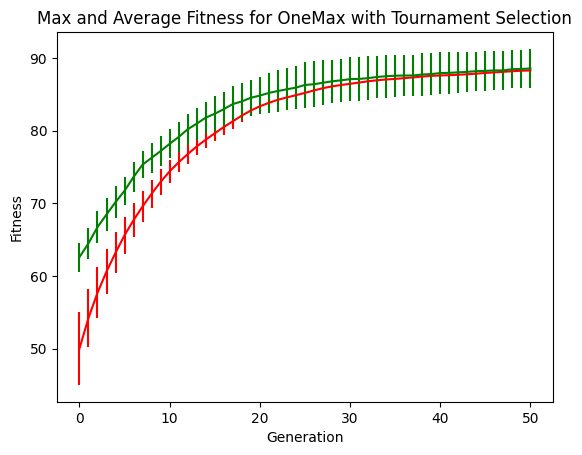

In [14]:
# Genetic Algorithm is done (all runs) - plot statistics:
x = numpy.arange(0, MAX_GENERATIONS+1)
avgArray = numpy.array(avgList)
stdArray = numpy.array(stdList)
minArray = numpy.array(minList)
maxArray = numpy.array(maxList)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Max and Average Fitness for OneMax with Tournament Selection')
plt.errorbar(x, avgArray.mean(0), yerr=stdArray.mean(0),label="Average",color="Red")
plt.errorbar(x, maxArray.mean(0), yerr=maxArray.std(0),label="Best", color="Green")
plt.show()